In [15]:
import random
##########################Example 01 
def adj():
    return random.choice('蓝色的|好看的|小小的'.split('|'))

def adj_star():
    return random.choice([None,adj() + adj()])
adj_star()

'好看的好看的'

In [10]:
##########################Example 02
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>蓝色的 | 好看的 | 小小的
"""

grammar = {}
for line in adj_grammar.split('\n'):
    if not line.strip(): continue
    exp, stmt = line.split('=>')
    grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    
grammar
grammar['Adj']

def generate(gram,target):
    if target in gram:
        new_expanded = random.choice(gram[target])#target可以扩展
        return ''.join(generate(gram,t) for t in new_expanded)
    else:
        return target        
generate(gram=grammar,target='Adj*')




'蓝色的null'

In [99]:
###############################Example 03
##Defining grammer
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

grammar_sentence = {}
for line in simple_grammar.split('\n'):
    if not line.strip(): continue
    exp, stmt = line.split('=>')
    grammar_sentence[exp.strip()]=[s.split() for s in stmt.split('|')]
    

def generate_sentence(gram,target):
    if target not in gram: return target#means target is a terminal expression
    
    expand = [generate_sentence(gram,t) for t in random.choice(gram[target])]#target可以扩展
    return ''.join([e  for e in expand if e !='null'])
generate_sentence(gram=grammar_sentence,target='sentence')  


'一个篮球看着这个桌子'

In [25]:
#####################################Example 04
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

def defined_grammar(gram_sent,split='='):
    grammar_sentence = {}
    for line in gram_sent.split('\n'):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar_sentence[exp.strip()]=[s.split() for s in stmt.split('|')]
    return grammar_sentence
    

def generate_sentence(gram,target):
    if target not in gram: return target
    expand = [generate_sentence(gram,t) for t in random.choice(gram[target])]#target可以扩展
    return ''.join([e if e!='/n' else '\n'  for e in expand if e !='null'])

grammar_sentence = defined_grammar(human,'=')
generate_sentence(gram=grammar_sentence,target='human')  


grammar_sentence = defined_grammar(host,'=')
generate_sentence(gram=grammar_sentence,target='host')


for i in range(20):
    print(generate_sentence(gram=defined_grammar(human, '='), target='human'))
print('\n\n\n')    
for i in range(20):
    print(generate_sentence(gram=defined_grammar(host, '='), target='host'))


我想找点玩的
我们找找玩的
俺找找乐子
我想找点乐子
我想找点乐子
我们找找乐子
我想找点玩的
俺想找点乐子
我们想找点乐子
我想找点玩的
俺找找乐子
俺找找玩的
俺找找乐子
我们想找点乐子
俺想找点乐子
我们想找点乐子
俺找找玩的
我们想找点乐子
我想找点玩的
我找找玩的




小朋友,你好我是5号,请问你要打猎吗？
您好我是4号,您需要赌博吗？
你好我是6号,请问你要打猎吗？
小朋友,你好我是925号,您需要喝酒吗？
您好我是297号,您需要喝酒吗？
先生,你好我是16号,请问你要打牌吗？
女士,你好我是212号,请问你要喝酒吗？
你好我是78号,请问你要打牌吗？
您好我是3号,您需要打猎吗？
你好我是1号,请问你要打猎吗？
先生,你好我是41号,请问你要打猎吗？
先生,你好我是8号,您需要打牌吗？
女士,您好我是98号,您需要赌博吗？
先生,您好我是93号,您需要赌博吗？
小朋友,你好我是9号,请问你要打猎吗？
先生,您好我是32号,请问你要打猎吗？
女士,你好我是5号,您需要赌博吗？
你好我是24号,您需要赌博吗？
您好我是16号,您需要喝酒吗？
女士,您好我是8377号,请问你要喝酒吗？


In [31]:
###################################Example 05
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

print(generate_sentence(gram=defined_grammar(programming, '=>'), target='stmt'))

if(student2){
....name1=info3}


In [38]:
####################################Example 06  Language Model
import pandas as pd
data = pd.read_csv(r'C:\Users\zhangxing\Documents\GitHub\NLP-COURSE\Data\export_sql_1558435\sqlResult_1558435.csv',encoding='gb18030')
data.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [42]:
import re
import jieba
from collections import Counter
articles = data['content'].tolist()
Counter(jieba.cut(articles[66])).most_common()

[('，', 33),
 ('的', 20),
 ('成都', 19),
 ('。', 14),
 ('《', 13),
 ('》', 13),
 ('现场', 12),
 ('\r\n', 12),
 (' ', 11),
 ('、', 9),
 ('汽车', 7),
 ('音乐节', 7),
 ('了', 7),
 ('2017', 6),
 ('中国', 6),
 ('赵雷', 6),
 ('万人', 5),
 ('闭幕', 4),
 ('共唱', 4),
 ('舞台', 4),
 ('乐迷', 4),
 ('和', 4),
 ('崔健', 3),
 ('姑娘', 3),
 ('“', 3),
 ('们', 3),
 ('”', 3),
 ('黑色', 3),
 ('在', 3),
 ('内容', 3),
 ('6', 2),
 ('随着', 2),
 ('演唱', 2),
 ('花房', 2),
 ('将', 2),
 ('晚上', 2),
 ('起', 2),
 ('也', 2),
 ('T恤', 2),
 ('不', 2),
 ('与', 2),
 ('演出', 2),
 ('…', 2),
 ('唱出', 2),
 ('观众', 2),
 ('当', 2),
 ('摇滚', 2),
 ('音乐', 2),
 ('不同', 2),
 ('进行', 2),
 ('乐队', 2),
 ('本文', 2),
 ('以及', 2),
 ('文字', 2),
 ('本站', 2),
 ('请', 2),
 ('央广网', 1),
 ('月', 1),
 ('19', 1),
 ('日', 1),
 ('消息', 1),
 ('（', 1),
 ('记者', 1),
 ('刘涛', 1),
 ('）', 1),
 ('18', 1),
 ('日晚', 1),
 ('推向', 1),
 ('高潮', 1),
 ('20', 1),
 (':', 1),
 ('17', 1),
 ('分', 1),
 ('绚烂', 1),
 ('亮', 1),
 ('赵雷来', 1),
 ('这个', 1),
 ('因', 1),
 ('一首', 1),
 ('而', 1),
 ('走红', 1),
 ('酒吧', 1),
 ('歌手', 1),
 ('应景', 1),
 ('跟', 

In [44]:
#使用正则表达式去掉一些标点符号之后再进行结巴分词
def token(article):
    return re.findall('\w+',article)##提取出汉字、字母、数字、下划线

articles = data['content'].tolist()
Counter(jieba.cut(''.join(token(articles[66])))).most_common()

[('的', 20),
 ('成都', 19),
 ('现场', 12),
 ('2017', 7),
 ('汽车', 7),
 ('音乐节', 7),
 ('了', 7),
 ('中国', 6),
 ('赵雷', 6),
 ('万人', 5),
 ('闭幕', 4),
 ('共唱', 4),
 ('舞台', 4),
 ('乐迷', 4),
 ('和', 4),
 ('崔健', 3),
 ('姑娘', 3),
 ('们', 3),
 ('黑色', 3),
 ('在', 3),
 ('内容', 3),
 ('6', 2),
 ('随着', 2),
 ('演唱', 2),
 ('花房', 2),
 ('将', 2),
 ('晚上', 2),
 ('也', 2),
 ('T恤', 2),
 ('不', 2),
 ('与', 2),
 ('演出', 2),
 ('唱出', 2),
 ('观众', 2),
 ('当', 2),
 ('摇滚', 2),
 ('音乐', 2),
 ('不同', 2),
 ('进行', 2),
 ('乐队', 2),
 ('本文', 2),
 ('以及', 2),
 ('文字', 2),
 ('本站', 2),
 ('请', 2),
 ('央广网', 1),
 ('月', 1),
 ('19', 1),
 ('日', 1),
 ('消息', 1),
 ('记者', 1),
 ('刘涛', 1),
 ('18', 1),
 ('日晚', 1),
 ('推向', 1),
 ('高潮', 1),
 ('分', 1),
 ('绚烂', 1),
 ('亮起', 1),
 ('赵雷来', 1),
 ('这个', 1),
 ('因', 1),
 ('一首', 1),
 ('而', 1),
 ('走红', 1),
 ('酒吧', 1),
 ('歌手', 1),
 ('应景', 1),
 ('跟', 1),
 ('打', 1),
 ('起', 1),
 ('招呼', 1),
 ('我们', 1),
 ('爱', 1),
 ('祝', 1),
 ('今天', 1),
 ('所有', 1),
 ('父亲', 1),
 ('节日快乐', 1),
 ('一袭', 1),
 ('牛仔裤', 1),
 ('站上', 1),
 ('仔细', 1),
 ('一看', 1),
 ('

In [66]:
articles_clean = [''.join(token(str(i))) for i in articles]

#def cut(string): return list(jieba.cut(string))
#TOKEN=[]
#for i in articles_clean:
#    TOKEN += cut(i)
#Counter(TOKEN).most_common()[:10]
#以上直接运行比较耗时耗内存，可先将处理后的文本保存，再逐行读取jieba分词。

with open('article_clean.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')
        
def cut(string): return list(jieba.cut(string))
TOKEN=[]        
with open('article_clean.txt','r') as f:
    for i,line in enumerate(f.readlines()):
        if i % 1000 == 0:print(i)
        TOKEN += cut(line)
        
words_count = Counter(TOKEN)
frequency = [f for w,f in words_count]
words = [w for w,f in words_count]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


ValueError: not enough values to unpack (expected 2, got 1)

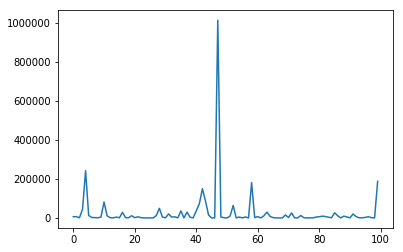

In [81]:
frequency = [f for w,f in words_count.items()]
words = [w for w,f in words_count.items()]
import matplotlib.pyplot as plt
plt.plot([i for i in range(100)],frequency[:100])

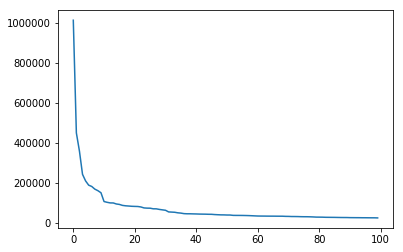

In [82]:
frequency.sort(reverse=True)
frequency
plt.plot([i for i in range(100)],frequency[:100])

In [85]:
##########################计算一个语句的概率
##1-gram的概率
def Prob_1(word):
    return words_count[word]/len(TOKEN)
Prob_1('大家')

0.00021128241541860062

In [90]:
##2-gram的概率
TOKEN_2_gram = [''.join(TOKEN[i:(i+2)]) for i in range(len(TOKEN)-2)]
TOKEN_2_gram[:10]
words_count_2_gram = Counter(TOKEN_2_gram)
def Prob_2(word1,word2):
    if word1 + word2 in TOKEN_2_gram:
        return words_count_2_gram[word1+word2]/len(TOKEN_2_gram)
    else:
        return 1/len(TOKEN_2_gram)
Prob_2('自然','语言')
    

4.097797376540946e-08

In [93]:
##计算一句话的概率
def Sentence_Prob(sentence):
    words = cut(sentence)
    sent_prob = 1
    for i,w in enumerate(words[:-1]):
        sent_prob *= Prob_2(w,words[i+1])
    return sent_prob
Sentence_Prob('她是一个女孩')  
    

2.94127990093397e-15

In [94]:
Sentence_Prob('他是一个女孩')

7.891238758603334e-15

In [95]:

Sentence_Prob('小明今天抽奖抽到一台苹果手机')

3.929895234121031e-43

In [96]:
Sentence_Prob('小明今天抽奖抽到一架波音飞机')

3.1391813737617396e-42

In [100]:
for sent in [generate_sentence(gram=grammar_sentence,target='sentence')   for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sent, Sentence_Prob(sent)))

sentence: 这个小猫坐在这个小小的好看的篮球 with Prb: 5.549059653990496e-48
sentence: 这个篮球看见一个小猫 with Prb: 2.5377242499578545e-29
sentence: 这个小猫看着这个好看的小猫 with Prb: 9.659019611574585e-41
sentence: 一个女人坐在这个小小的蓝色的小猫 with Prb: 2.519443823208732e-46
sentence: 一个好看的蓝色的蓝色的女人看见这个小小的女人 with Prb: 1.1072903880122606e-68
sentence: 这个好看的篮球听着一个蓝色的小小的蓝色的好看的桌子 with Prb: 8.169231441231166e-89
sentence: 这个蓝色的女人看见这个蓝色的好看的桌子 with Prb: 6.138714774781843e-65
sentence: 这个好看的小小的小猫看着一个女人 with Prb: 2.1730583260382365e-49
sentence: 这个女人看着这个小猫 with Prb: 2.114770208298212e-28
sentence: 一个女人听着这个小小的蓝色的好看的篮球 with Prb: 1.5904616776741672e-62


In [101]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = Sentence_Prob(s1), Sentence_Prob(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 5.5983321730989935e-67
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 3.732221448732663e-67
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.5714164991613139e-34
---- 真是一只好看的小猫 with probility 3.834783311047425e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 4.5414587699144414e-20
---- 今晚火锅去吃我 with probility 6.090538199898851e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.3761996272468002e-22
---- 养乐多绿来一杯 with probility 1.6791943339185857e-15
